In [1]:
from helpers import helper_functions
import time

import tensorflow as tf
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
root_dir='/global/homes/a/abbatej/plasma_profiles_predictor/'
model_filename='test_model.h5'
input_dir='/global/homes/a/abbatej/'

In [4]:
train_data = helper_functions.load_obj(input_dir+'train_data')
train_target = helper_functions.load_obj(input_dir+'train_target')
val_data = helper_functions.load_obj(input_dir+'val_data')
val_target = helper_functions.load_obj(input_dir+'val_target')
rho_points = helper_functions.load_obj(input_dir+'rho_standard')

loaded_model=models.load_model(root_dir+model_filename)

loaded_model.compile(optimizer=optimizers.RMSprop(lr=.001),
                     metrics=['mae'], loss='mse')

In [9]:
font={'size': 10}
plt.rc('font', **font)

# put in a timestep or an array of timesteps and it will plot
# the previous, next, and predicted_next signal
def plot_timesteps(arr, train=False):
    if isinstance(arr,int):
        arr=[arr]
    #rho_points=helper_functions.get_rho_points(num_rho)
    #rho_points=[i/max(rho_points) for i in rho_points]
    if(train):
        data=train_data
        target=train_target
    else:
        data=val_data
        target=val_target

    fig,axes = plt.subplots(len(arr),1)
    for i,timestep in enumerate(arr):
        pred=np.ndarray.flatten(loaded_model.predict(np.array(data)[timestep:timestep+1]))
        true=target[timestep]
        prev=data[timestep][-1][-len(true):]
        sigs=data[timestep][-1][:-len(true)] #pinj, tinj, curr
        
        try: 
            ax=axes[i]
        except: 
            ax=axes
        if(i==0):
            ax.set_title('Normalized e_temp Predictions on Novel Data')
        if(i==len(arr)-1):
            ax.set_xlabel('Normalized rho')
        ax.plot(rho_points,pred,label='Predicted')
        ax.plot(rho_points,true,label='True')
        ax.plot(rho_points,prev,label='Previous')
        textstr='\n'.join((
            'Normalized actuator values:',
            'Injected Power=%.2f'%sigs[1],
            'Injected Torque=%.2f'%sigs[2],
            'Target Current=%.2f'%sigs[0]
        ))
        ax.text(0.05,0.05,textstr, transform=ax.transAxes)
        ax.legend(loc='upper right')
    plt.show()

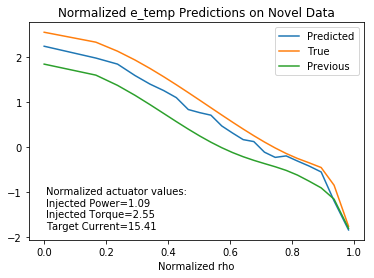

In [10]:
plot_timesteps(100)

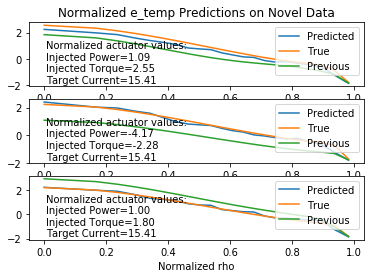

In [11]:
plot_timesteps([100,200,300])